In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
with open('data/input_18.txt') as fh:
    file_input = fh.read()

In [4]:
test_input = """.#.#...|#.
.....#|##|
.|..|...#.
..|#.....#
#.#|||#|#|
...#.||...
.|....|...
||...#|.#|
|.||||..|.
...#.|..|.
"""

In [203]:
def read_field(inp):
    n = len(inp.strip().split('\n'))
    field = np.zeros((n, n))
    for y, line in enumerate(inp.strip().split('\n')):
        for x, c in enumerate(line):
            if c == '|':
                field[x, y] = 1
            elif c == '#':
                field[x, y] = 2
    return field

def gen_window(f):
    nx, ny = f.shape
    n = nx
    stack = []
    for dy in range(-1, 2):
        for dx in range(-1, 2):
            if dx == 0 and dy == 0:
                continue
            dum = np.zeros((n, n))                        
            dum[max(-dx, 0):n-dx, max(-dy, 0):n-dy] = field[max(dx, 0):n+dx, max(dy, 0):n+dy]
            stack.append(dum)
    return np.dstack(stack)

def evolve(field, steps=1, output=False):
    for s in range(steps):        
        nbs = gen_window(field)
        nbs_open = np.sum(nbs==0, axis=2)
        nbs_tree = np.sum(nbs==1, axis=2)
        nbs_ly = np.sum(nbs==2, axis=2)
        open_acres = (field == 0)
        tree_acres = (field == 1)
        ly_acres = (field == 2)

        field[open_acres & (nbs_tree >= 3)] = 1
        field[tree_acres & (nbs_ly >= 3)] = 2
        field[ly_acres & ((nbs_tree == 0) | (nbs_ly == 0))] = 0
        if output:
            plt.imshow(field.T)
            plt.savefig('images/door_18_{:04d}.png'.format(s))
    return field

Test case

In [139]:
field = read_field(test_input)
evolve(field, 10)
print("resource value: {}".format(np.sum(field==1) * np.sum(field==2)))

resource value: 1147


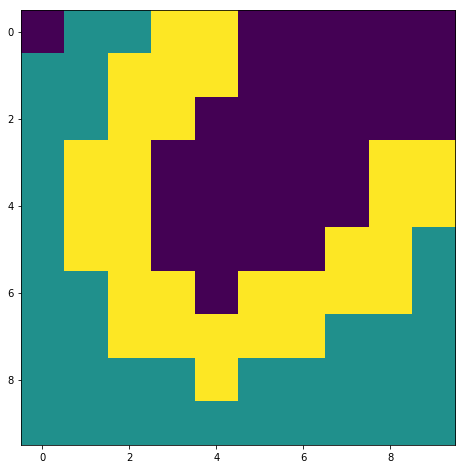

In [140]:
plt.imshow(field.T)

Part A

In [141]:
%%time
field = read_field(file_input)
evolve(field, 10)
print("resource value: {}".format(np.sum(field==1) * np.sum(field==2)))

resource value: 394420
CPU times: user 14 ms, sys: 1e+03 µs, total: 15 ms
Wall time: 18.7 ms


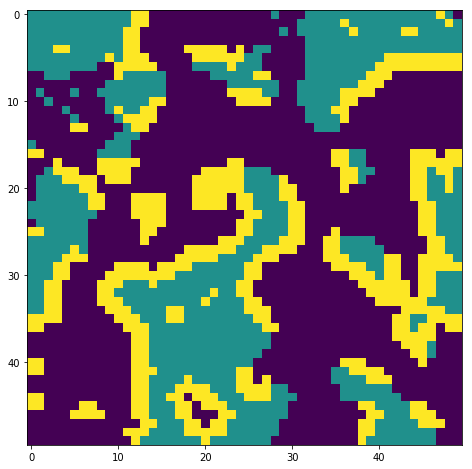

In [142]:
plt.imshow(field.T)

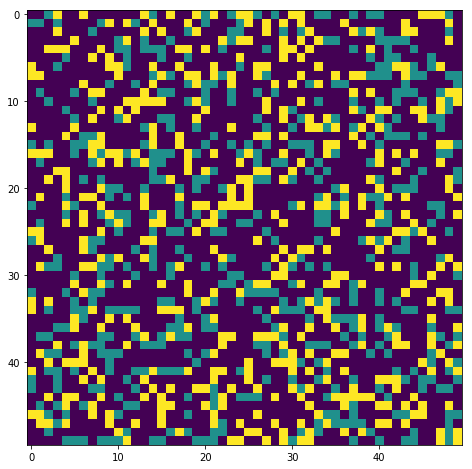

In [144]:
field = read_field(file_input)
plt.imshow(field.T)

Part B

In [167]:
def evolveB(field, steps=1):
    values = [0]
    for s in range(steps):        
        nbs = gen_window(field)
        nbs_open = np.sum(nbs==0, axis=2)
        nbs_tree = np.sum(nbs==1, axis=2)
        nbs_ly = np.sum(nbs==2, axis=2)
        open_acres = (field == 0)
        tree_acres = (field == 1)
        ly_acres = (field == 2)

        field[open_acres & (nbs_tree >= 3)] = 1
        field[tree_acres & (nbs_ly >= 3)] = 2
        field[ly_acres & ((nbs_tree == 0) | (nbs_ly == 0))] = 0
        values.append(np.sum(field==1) * np.sum(field==2))
    return np.array(values)
    

In [168]:
%%time
field = read_field(file_input)
values = evolveB(field, 10000)
print("resource value: {}".format(np.sum(field==1) * np.sum(field==2)))

resource value: 237636
CPU times: user 5.02 s, sys: 1 ms, total: 5.02 s
Wall time: 5.12 s


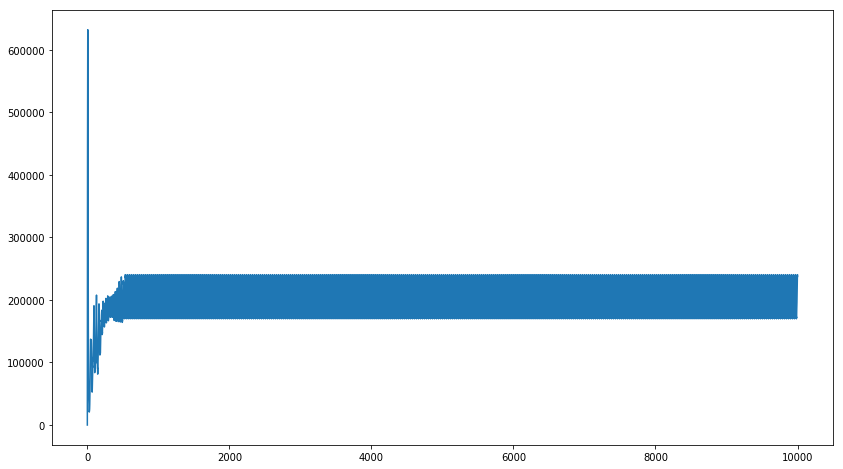

In [205]:
plt.plot(values)

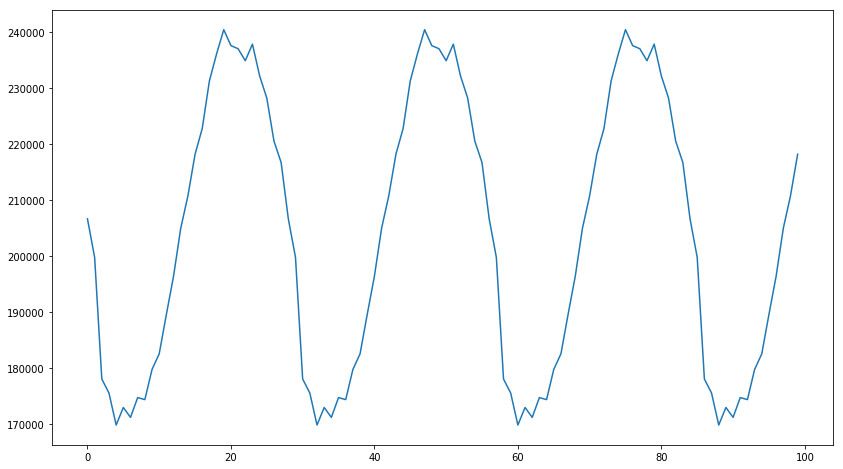

In [169]:
plt.plot(values[2000:2100])

In [170]:
for shift in range(1, 30):
    diff = values[2000:3000]-values[2000-shift:3000-shift]
    if diff.sum() == 0:
        print("shift:", shift)
        break

shift: 28


In [187]:
results = values[(shift*100):(shift*100+shift+1)]

In [189]:
n = 3617
print(results[n%shift], values[n])

237082 237082


In [190]:
print("Solution B: {}".format(results[target % shift]))

Solution B: 174420


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 2., 2., ..., 0., 0., 0.],
       [1., 2., 2., ..., 0., 0., 0.]])

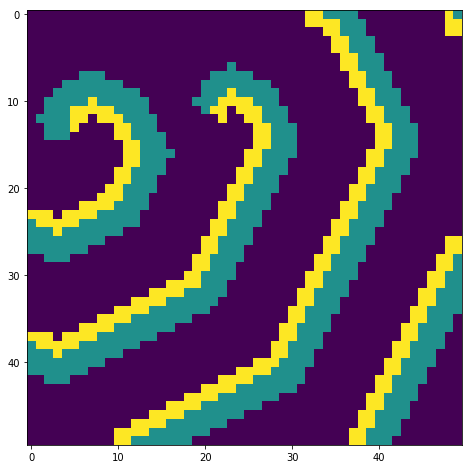

In [206]:
# make movie images
field = read_field(file_input)
evolve(field, steps=1000, output=True)